<a href="https://colab.research.google.com/github/jgkorman/Python-Projects/blob/main/State_Capture_and_Populism_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [501]:
!pip install linearmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [502]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from linearmodels import PanelOLS
from linearmodels import RandomEffects
import statsmodels.api as sm

In [503]:
fname = "/content/drive/MyDrive/Delaware/Julio Work/Finalized_StateCapture_Dataset.xlsx"
sc = pd.read_excel(fname)

In [504]:
sc

,ID,Country,year,FDI_Inflows,DV_Populism (populist president in power that year or not (0 or 1),Time,TRANS,VDEM.Party.Inst,prtyin,Logprtyin,...,v2mecenefm,v2xnp_pres,v2xnp_client,v2xps_party,v2x_accountability,v2x_accountability transformed,prtyinXaccountability,prtyinXlegconstraints,prtyinXjudicialconstraints,prtyinXpresidentialism
0,1,Argentina,1996,6.948537e+09,NaN,0,0.0,0.688,7.0,0.845098,...,1.725,0.315,0.493,0.688,1.424,2.474,17.318,4.865,4.109,2.205
1,1,Argentina,1997,9.160272e+09,NaN,1,0.0,0.688,8.0,0.903090,...,1.725,0.315,0.491,0.688,1.414,2.464,19.712,5.560,4.696,2.520
2,1,Argentina,1998,7.290657e+09,NaN,2,0.0,0.688,9.0,0.954243,...,1.725,0.311,0.482,0.688,1.423,2.473,22.257,6.255,5.409,2.799
3,1,Argentina,1999,2.398770e+10,NaN,3,0.0,0.688,10.0,1.000000,...,1.725,0.310,0.482,0.688,1.429,2.479,24.790,6.950,6.070,3.100
4,1,Argentina,2000,1.041831e+10,NaN,4,1.0,0.682,1.0,0.000000,...,2.047,0.234,0.409,0.682,1.484,2.534,2.534,0.701,0.717,0.234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,19,Venezuela,2013,2.145000e+09,NaN,17,0.0,0.572,15.0,1.176091,...,-1.155,0.966,0.813,0.572,-0.259,0.791,11.865,0.465,0.345,14.490
414,19,Venezuela,2014,1.135000e+09,NaN,18,0.0,0.570,16.0,1.204120,...,-1.316,0.969,0.809,0.570,-0.295,0.755,12.080,0.496,0.288,15.504
415,19,Venezuela,2015,2.956000e+09,NaN,19,0.0,0.550,17.0,1.230449,...,-1.661,0.961,0.813,0.550,-0.179,0.871,14.807,3.247,0.306,16.337
416,19,Venezuela,2016,1.587000e+09,NaN,20,0.0,0.536,18.0,1.255273,...,-1.661,0.964,0.890,0.536,-0.158,0.892,16.056,6.480,0.270,17.352


In [505]:
fname = "/content/drive/MyDrive/Delaware/Julio Work/Populist presidents.xlsx"
poppres = pd.read_excel(fname)
poppres

,Country,Year,PopDV,YearsPOP
0,Argentina,1996.0,0,0.0
1,Argentina,1997.0,0,0.0
2,Argentina,1998.0,0,0.0
3,Argentina,1999.0,0,0.0
4,Argentina,2000.0,0,0.0
...,...,...,...,...
464,Venezuela,2018.0,1,20.0
465,Venezuela,2019.0,1,21.0
466,Venezuela,2020.0,1,22.0
467,Venezuela,2021.0,1,23.0


In [506]:
print(sc['Country'].unique())
print(len(sc['Country'].unique()))

['Argentina' 'Bolivia' 'Brazil' 'Chile' 'Colombia' 'Costa Rica' 'Cuba'
 'Dom. Rep.' 'Ecuador' 'Guatemala' 'Honduras' 'Mexico' 'Nicaragua'
 'Panama' 'Peru' 'Paraguay' 'El Salvador' 'Uruguay' 'Venezuela']
19


In [507]:
print(poppres['Country'].unique())
print(len(poppres['Country'].unique()))

['Argentina' 'Bolivia' 'Brazil' 'Chile' 'Colombia' 'CostaRica' 'DomRep'
 'Ecuador' 'ElSalvador' 'Guatemala' 'Honduras' 'Mexico' 'Nicaragua'
 'Panama' 'Paraguay' 'Peru' 'Uruguay' 'Venezuela' nan]
19


In [508]:
poppres_country = poppres["Country"].replace({"CostaRica": "Costa Rica", "DomRep": "Dom. Rep.", "ElSalvador": "El Salvador"})


In [509]:
poppres_country.unique()

array(['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia',
       'Costa Rica', 'Dom. Rep.', 'Ecuador', 'El Salvador', 'Guatemala',
       'Honduras', 'Mexico', 'Nicaragua', 'Panama', 'Paraguay', 'Peru',
       'Uruguay', 'Venezuela', nan], dtype=object)

In [510]:
poppres['country_new'] = poppres_country
poppres = poppres.dropna()

In [511]:
poppres = poppres.drop(columns='Country')
poppres['Year'] = poppres['Year'].astype(int)
poppres

,Year,PopDV,YearsPOP,country_new
0,1996,0,0.0,Argentina
1,1997,0,0.0,Argentina
2,1998,0,0.0,Argentina
3,1999,0,0.0,Argentina
4,2000,0,0.0,Argentina
...,...,...,...,...
463,2017,1,19.0,Venezuela
464,2018,1,20.0,Venezuela
465,2019,1,21.0,Venezuela
466,2020,1,22.0,Venezuela


In [512]:
poppres.dtypes

Year             int64
PopDV           object
YearsPOP       float64
country_new     object
dtype: object

In [513]:
sc

,ID,Country,year,FDI_Inflows,DV_Populism (populist president in power that year or not (0 or 1),Time,TRANS,VDEM.Party.Inst,prtyin,Logprtyin,...,v2mecenefm,v2xnp_pres,v2xnp_client,v2xps_party,v2x_accountability,v2x_accountability transformed,prtyinXaccountability,prtyinXlegconstraints,prtyinXjudicialconstraints,prtyinXpresidentialism
0,1,Argentina,1996,6.948537e+09,NaN,0,0.0,0.688,7.0,0.845098,...,1.725,0.315,0.493,0.688,1.424,2.474,17.318,4.865,4.109,2.205
1,1,Argentina,1997,9.160272e+09,NaN,1,0.0,0.688,8.0,0.903090,...,1.725,0.315,0.491,0.688,1.414,2.464,19.712,5.560,4.696,2.520
2,1,Argentina,1998,7.290657e+09,NaN,2,0.0,0.688,9.0,0.954243,...,1.725,0.311,0.482,0.688,1.423,2.473,22.257,6.255,5.409,2.799
3,1,Argentina,1999,2.398770e+10,NaN,3,0.0,0.688,10.0,1.000000,...,1.725,0.310,0.482,0.688,1.429,2.479,24.790,6.950,6.070,3.100
4,1,Argentina,2000,1.041831e+10,NaN,4,1.0,0.682,1.0,0.000000,...,2.047,0.234,0.409,0.682,1.484,2.534,2.534,0.701,0.717,0.234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,19,Venezuela,2013,2.145000e+09,NaN,17,0.0,0.572,15.0,1.176091,...,-1.155,0.966,0.813,0.572,-0.259,0.791,11.865,0.465,0.345,14.490
414,19,Venezuela,2014,1.135000e+09,NaN,18,0.0,0.570,16.0,1.204120,...,-1.316,0.969,0.809,0.570,-0.295,0.755,12.080,0.496,0.288,15.504
415,19,Venezuela,2015,2.956000e+09,NaN,19,0.0,0.550,17.0,1.230449,...,-1.661,0.961,0.813,0.550,-0.179,0.871,14.807,3.247,0.306,16.337
416,19,Venezuela,2016,1.587000e+09,NaN,20,0.0,0.536,18.0,1.255273,...,-1.661,0.964,0.890,0.536,-0.158,0.892,16.056,6.480,0.270,17.352


In [514]:
sc_pop = pd.merge(sc, poppres, left_on=['Country','year'], right_on = ['country_new','Year'])
sc_pop

,ID,Country,year,FDI_Inflows,DV_Populism (populist president in power that year or not (0 or 1),Time,TRANS,VDEM.Party.Inst,prtyin,Logprtyin,...,v2x_accountability,v2x_accountability transformed,prtyinXaccountability,prtyinXlegconstraints,prtyinXjudicialconstraints,prtyinXpresidentialism,Year,PopDV,YearsPOP,country_new
0,1,Argentina,1996,6.948537e+09,NaN,0,0.0,0.688,7.0,0.845098,...,1.424,2.474,17.318,4.865,4.109,2.205,1996,0,0.0,Argentina
1,1,Argentina,1997,9.160272e+09,NaN,1,0.0,0.688,8.0,0.903090,...,1.414,2.464,19.712,5.560,4.696,2.520,1997,0,0.0,Argentina
2,1,Argentina,1998,7.290657e+09,NaN,2,0.0,0.688,9.0,0.954243,...,1.423,2.473,22.257,6.255,5.409,2.799,1998,0,0.0,Argentina
3,1,Argentina,1999,2.398770e+10,NaN,3,0.0,0.688,10.0,1.000000,...,1.429,2.479,24.790,6.950,6.070,3.100,1999,0,0.0,Argentina
4,1,Argentina,2000,1.041831e+10,NaN,4,1.0,0.682,1.0,0.000000,...,1.484,2.534,2.534,0.701,0.717,0.234,2000,0,0.0,Argentina
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,19,Venezuela,2012,4.986000e+09,NaN,16,0.0,0.544,14.0,1.146128,...,-0.070,0.980,13.720,0.434,0.504,13.258,2012,1,14.0,Venezuela
391,19,Venezuela,2013,2.145000e+09,NaN,17,0.0,0.572,15.0,1.176091,...,-0.259,0.791,11.865,0.465,0.345,14.490,2013,1,15.0,Venezuela
392,19,Venezuela,2014,1.135000e+09,NaN,18,0.0,0.570,16.0,1.204120,...,-0.295,0.755,12.080,0.496,0.288,15.504,2014,1,16.0,Venezuela
393,19,Venezuela,2015,2.956000e+09,NaN,19,0.0,0.550,17.0,1.230449,...,-0.179,0.871,14.807,3.247,0.306,16.337,2015,1,17.0,Venezuela


In [515]:
sc_pop['year'].value_counts()

1996    18
1997    18
2016    18
2015    18
2014    18
2013    18
2012    18
2011    18
2010    18
2009    18
2008    18
2007    18
2006    18
2005    18
2004    18
2003    18
2002    18
2001    18
2000    18
1999    18
1998    18
2017    17
Name: year, dtype: int64

In [516]:
sc_pop

,ID,Country,year,FDI_Inflows,DV_Populism (populist president in power that year or not (0 or 1),Time,TRANS,VDEM.Party.Inst,prtyin,Logprtyin,...,v2x_accountability,v2x_accountability transformed,prtyinXaccountability,prtyinXlegconstraints,prtyinXjudicialconstraints,prtyinXpresidentialism,Year,PopDV,YearsPOP,country_new
0,1,Argentina,1996,6.948537e+09,NaN,0,0.0,0.688,7.0,0.845098,...,1.424,2.474,17.318,4.865,4.109,2.205,1996,0,0.0,Argentina
1,1,Argentina,1997,9.160272e+09,NaN,1,0.0,0.688,8.0,0.903090,...,1.414,2.464,19.712,5.560,4.696,2.520,1997,0,0.0,Argentina
2,1,Argentina,1998,7.290657e+09,NaN,2,0.0,0.688,9.0,0.954243,...,1.423,2.473,22.257,6.255,5.409,2.799,1998,0,0.0,Argentina
3,1,Argentina,1999,2.398770e+10,NaN,3,0.0,0.688,10.0,1.000000,...,1.429,2.479,24.790,6.950,6.070,3.100,1999,0,0.0,Argentina
4,1,Argentina,2000,1.041831e+10,NaN,4,1.0,0.682,1.0,0.000000,...,1.484,2.534,2.534,0.701,0.717,0.234,2000,0,0.0,Argentina
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,19,Venezuela,2012,4.986000e+09,NaN,16,0.0,0.544,14.0,1.146128,...,-0.070,0.980,13.720,0.434,0.504,13.258,2012,1,14.0,Venezuela
391,19,Venezuela,2013,2.145000e+09,NaN,17,0.0,0.572,15.0,1.176091,...,-0.259,0.791,11.865,0.465,0.345,14.490,2013,1,15.0,Venezuela
392,19,Venezuela,2014,1.135000e+09,NaN,18,0.0,0.570,16.0,1.204120,...,-0.295,0.755,12.080,0.496,0.288,15.504,2014,1,16.0,Venezuela
393,19,Venezuela,2015,2.956000e+09,NaN,19,0.0,0.550,17.0,1.230449,...,-0.179,0.871,14.807,3.247,0.306,16.337,2015,1,17.0,Venezuela


In [517]:
sc_pop['Resource_Extraction']

0      0
1      0
2      0
3      0
4      0
      ..
390    1
391    1
392    1
393    1
394    1
Name: Resource_Extraction, Length: 395, dtype: int64

In [518]:
sc_pop.columns

Index(['ID', 'Country', 'year', 'FDI_Inflows',
       'DV_Populism (populist president in power that year or not (0 or 1) ',
       'Time', 'TRANS', 'VDEM.Party.Inst', 'prtyin', 'Logprtyin',
       'SQPrtyinPower', 'CubedPrtyinPower',
       'State.Capture.Inverted.Transformed', 'State.Capture.Inverted',
       'State_Capture (WB)', 'State_Capture.WB.Transformed', 'GDPPC.WB',
       'LogGDPPC', 'VDEM.Lib.DEM', 'POLITY', 'POLITY10', 'POLITYDV',
       'Civ_Lib_FH_1to7_7worst', 'Drug_Trafficking', 'Resource_Extraction',
       'PrtyinPowerXLogGDPPC', 'PercentPOP.Urban.WB', 'POP.WB', 'LogPOP.WB',
       'TOTPercentNatResRentsGDP.WB', 'Econ.Freedom.Heritage',
       'Log.Econ.Freedom.Heritage', 'GDP', 'LogGDP', 'country_text_id',
       'v2x_jucon', 'v2xlg_legcon', 'v2pscohesv', 'v2x_rule', 'v2xcl_prpty',
       'v2xcl_acjst', 'v2x_cspart', 'v2psprlnks', 'v2lgcrrpt', 'v2exbribe',
       'v2mecenefm', 'v2xnp_pres', 'v2xnp_client', 'v2xps_party',
       'v2x_accountability', 'v2x_accountabil

In [519]:
sc_pop.columns

Index(['ID', 'Country', 'year', 'FDI_Inflows',
       'DV_Populism (populist president in power that year or not (0 or 1) ',
       'Time', 'TRANS', 'VDEM.Party.Inst', 'prtyin', 'Logprtyin',
       'SQPrtyinPower', 'CubedPrtyinPower',
       'State.Capture.Inverted.Transformed', 'State.Capture.Inverted',
       'State_Capture (WB)', 'State_Capture.WB.Transformed', 'GDPPC.WB',
       'LogGDPPC', 'VDEM.Lib.DEM', 'POLITY', 'POLITY10', 'POLITYDV',
       'Civ_Lib_FH_1to7_7worst', 'Drug_Trafficking', 'Resource_Extraction',
       'PrtyinPowerXLogGDPPC', 'PercentPOP.Urban.WB', 'POP.WB', 'LogPOP.WB',
       'TOTPercentNatResRentsGDP.WB', 'Econ.Freedom.Heritage',
       'Log.Econ.Freedom.Heritage', 'GDP', 'LogGDP', 'country_text_id',
       'v2x_jucon', 'v2xlg_legcon', 'v2pscohesv', 'v2x_rule', 'v2xcl_prpty',
       'v2xcl_acjst', 'v2x_cspart', 'v2psprlnks', 'v2lgcrrpt', 'v2exbribe',
       'v2mecenefm', 'v2xnp_pres', 'v2xnp_client', 'v2xps_party',
       'v2x_accountability', 'v2x_accountabil

**Setting up the fixed and random effects models**

In [520]:
year = pd.Categorical(sc_pop['year'])

In [521]:
model = sc_pop.set_index(['ID', 'year']).copy()
model['year'] = year

In [522]:
model.columns

Index(['Country', 'FDI_Inflows',
       'DV_Populism (populist president in power that year or not (0 or 1) ',
       'Time', 'TRANS', 'VDEM.Party.Inst', 'prtyin', 'Logprtyin',
       'SQPrtyinPower', 'CubedPrtyinPower',
       'State.Capture.Inverted.Transformed', 'State.Capture.Inverted',
       'State_Capture (WB)', 'State_Capture.WB.Transformed', 'GDPPC.WB',
       'LogGDPPC', 'VDEM.Lib.DEM', 'POLITY', 'POLITY10', 'POLITYDV',
       'Civ_Lib_FH_1to7_7worst', 'Drug_Trafficking', 'Resource_Extraction',
       'PrtyinPowerXLogGDPPC', 'PercentPOP.Urban.WB', 'POP.WB', 'LogPOP.WB',
       'TOTPercentNatResRentsGDP.WB', 'Econ.Freedom.Heritage',
       'Log.Econ.Freedom.Heritage', 'GDP', 'LogGDP', 'country_text_id',
       'v2x_jucon', 'v2xlg_legcon', 'v2pscohesv', 'v2x_rule', 'v2xcl_prpty',
       'v2xcl_acjst', 'v2x_cspart', 'v2psprlnks', 'v2lgcrrpt', 'v2exbribe',
       'v2mecenefm', 'v2xnp_pres', 'v2xnp_client', 'v2xps_party',
       'v2x_accountability', 'v2x_accountability transforme

In [523]:
model[['State.Capture.Inverted.Transformed', 'Country', 'v2xnp_pres', 'v2x_accountability transformed']]

State.Capture.Inverted.Transformed    Country  v2xnp_pres  \
ID year                                                              
1  1996                            2.601000  Argentina       0.315   
   1997                                 NaN  Argentina       0.315   
   1998                            2.613000  Argentina       0.311   
   1999                                 NaN  Argentina       0.310   
   2000                            2.692000  Argentina       0.234   
...                                     ...        ...         ...   
19 2012                            3.768169  Venezuela       0.947   
   2013                            3.814032  Venezuela       0.966   
   2014                            3.899562  Venezuela       0.969   
   2015                            3.891322  Venezuela       0.961   
   2016                            3.853828  Venezuela       0.964   

         v2x_accountability transformed  
ID year                                  
1  1996                           2.474  
   1997                           2.464  
   1998                           2.473  
   1999                           2.479  
   2000                           2.534  
...                                 ...  
19 2012                           0.980  
   2013                           0.791  
   2014                           0.755  
   2015                           0.871  
   2016                           0.892  

[395 rows x 4 columns]

In [524]:
model.columns

Index(['Country', 'FDI_Inflows',
       'DV_Populism (populist president in power that year or not (0 or 1) ',
       'Time', 'TRANS', 'VDEM.Party.Inst', 'prtyin', 'Logprtyin',
       'SQPrtyinPower', 'CubedPrtyinPower',
       'State.Capture.Inverted.Transformed', 'State.Capture.Inverted',
       'State_Capture (WB)', 'State_Capture.WB.Transformed', 'GDPPC.WB',
       'LogGDPPC', 'VDEM.Lib.DEM', 'POLITY', 'POLITY10', 'POLITYDV',
       'Civ_Lib_FH_1to7_7worst', 'Drug_Trafficking', 'Resource_Extraction',
       'PrtyinPowerXLogGDPPC', 'PercentPOP.Urban.WB', 'POP.WB', 'LogPOP.WB',
       'TOTPercentNatResRentsGDP.WB', 'Econ.Freedom.Heritage',
       'Log.Econ.Freedom.Heritage', 'GDP', 'LogGDP', 'country_text_id',
       'v2x_jucon', 'v2xlg_legcon', 'v2pscohesv', 'v2x_rule', 'v2xcl_prpty',
       'v2xcl_acjst', 'v2x_cspart', 'v2psprlnks', 'v2lgcrrpt', 'v2exbribe',
       'v2mecenefm', 'v2xnp_pres', 'v2xnp_client', 'v2xps_party',
       'v2x_accountability', 'v2x_accountability transforme

In [525]:
model['PopDV'] = model['PopDV'].astype(int)


In [526]:
model['interaction'] = model['PopDV'] * model['v2x_rule']
model['interaction_continous'] = model['v2x_rule'] * model['POLITY10']

In [527]:
model['PopDV'].value_counts()

0    286
1    109
Name: PopDV, dtype: int64

In [528]:
model

Country   FDI_Inflows  \
ID year                            
1  1996  Argentina  6.948537e+09   
   1997  Argentina  9.160272e+09   
   1998  Argentina  7.290657e+09   
   1999  Argentina  2.398770e+10   
   2000  Argentina  1.041831e+10   
...            ...           ...   
19 2012  Venezuela  4.986000e+09   
   2013  Venezuela  2.145000e+09   
   2014  Venezuela  1.135000e+09   
   2015  Venezuela  2.956000e+09   
   2016  Venezuela  1.587000e+09   

         DV_Populism (populist president in power that year or not (0 or 1)   \
ID year                                                                        
1  1996                                                NaN                     
   1997                                                NaN                     
   1998                                                NaN                     
   1999                                                NaN                     
   2000                                                NaN                     
...                                                    ...                     
19 2012                                                NaN                     
   2013                                                NaN                     
   2014                                                NaN                     
   2015                                                NaN                     
   2016                                                NaN                     

         Time  TRANS  VDEM.Party.Inst  prtyin  Logprtyin  SQPrtyinPower  \
ID year                                                                   
1  1996     0    0.0            0.688     7.0   0.845098           49.0   
   1997     1    0.0            0.688     8.0   0.903090           64.0   
   1998     2    0.0            0.688     9.0   0.954243           81.0   
   1999     3    0.0            0.688    10.0   1.000000          100.0   
   2000     4    1.0            0.682     1.0   0.000000            1.0   
...       ...    ...              ...     ...        ...            ...   
19 2012    16    0.0            0.544    14.0   1.146128          196.0   
   2013    17    0.0            0.572    15.0   1.176091          225.0   
   2014    18    0.0            0.570    16.0   1.204120          256.0   
   2015    19    0.0            0.550    17.0   1.230449          289.0   
   2016    20    0.0            0.536    18.0   1.255273          324.0   

         CubedPrtyinPower  ...  prtyinXlegconstraints  \
ID year                    ...                          
1  1996             343.0  ...                  4.865   
   1997             512.0  ...                  5.560   
   1998             729.0  ...                  6.255   
   1999            1000.0  ...                  6.950   
   2000               1.0  ...                  0.701   
...                   ...  ...                    ...   
19 2012            2744.0  ...                  0.434   
   2013            3375.0  ...                  0.465   
   2014            4096.0  ...                  0.496   
   2015            4913.0  ...                  3.247   
   2016            5832.0  ...                  6.480   

         prtyinXjudicialconstraints  prtyinXpresidentialism  Year  PopDV  \
ID year                                                                    
1  1996                       4.109                   2.205  1996      0   
   1997                       4.696                   2.520  1997      0   
   1998                       5.409                   2.799  1998      0   
   1999                       6.070                   3.100  1999      0   
   2000                       0.717                   0.234  2000      0   
...                             ...                     ...   ...    ...   
19 2012                       0.504                  13.258  2012      1   
   2013                       0.345                  14.490  2013      1   
   2014                

# **Populism in the context of weak rule of law increases State Capture**
# GRab the EDI index from Varieties of Demcoracy Dataset 

In [529]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


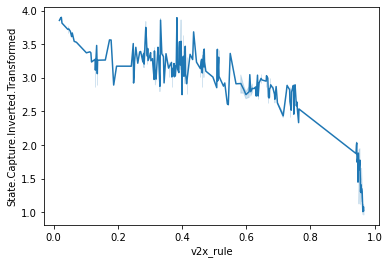

In [530]:
sns.lineplot('v2x_rule', 'State.Capture.Inverted.Transformed', data=model)

# **Creating Marginal Effects**

In [531]:
# random effects 

# added variables 
extras = ['v2xlg_legcon', 'v2x_jucon', 'v2x_rule', 'v2x_cspart', 'v2x_accountability transformed', 'v2xnp_pres', 'v2xcl_prpty']
exog_vars = ['PopDV', 'v2x_rule', 'interaction', 'POLITY10'] # use VDM EDI this will be initial model
# We build on top of this model and add variables stepwise to see if we continue to have the positive statistically significant effect of the interaction term of populism and rule of law
# we try to find a model where it is not statistically significant include  populismDV RULE OF LAW AND INTERACTION IN EVERY MODEL 

#  'prtyin', 'LogGDPPC', 'PercentPOP.Urban.WB', 'Econ.Freedom.Heritage', 'v2x_rule', 'v2x_accountability transformed', 'v2xcl_prpty', 'interaction', 'POLITY10']
exog = sm.add_constant(model[exog_vars])
mod = RandomEffects(model['State.Capture.Inverted.Transformed'], exog)
re_res = mod.fit()
print(re_res)

                                RandomEffects Estimation Summary                                
Dep. Variable:     State.Capture.Inverted.Transformed   R-squared:                        0.2409
Estimator:                              RandomEffects   R-squared (Between):              0.6122
No. Observations:                                 341   R-squared (Within):               0.0942
Date:                                Sun, Jul 10 2022   R-squared (Overall):              0.5877
Time:                                        05:00:54   Log-likelihood                    150.09
Cov. Estimator:                            Unadjusted                                           
                                                        F-statistic:                      26.656
Entities:                                          18   P-value                           0.0000
Avg Obs:                                       18.944   Distribution:                   F(4,336)
Min Obs:                      

/usr/local/lib/python3.7/dist-packages/linearmodels/shared/exceptions.py:37: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  warnings.warn(missing_value_warning_msg, MissingValueWarning)


Is there a difference between the .cov attribute from the re_res random efects model and the pandas.cov() function for calculating covariance matrix? ____ There IS!!!! You must use the regression variance covariance matrix 

## **1. Create variance covaraince matrix get a dataframe with only variables used in the model** 

In [532]:
model_plot = model[['State.Capture.Inverted.Transformed', 'PopDV', 'v2x_rule', 'interaction', 'POLITY10']].copy()

In [533]:
model_plot

State.Capture.Inverted.Transformed  PopDV  v2x_rule  interaction  \
ID year                                                                     
1  1996                            2.601000      0     0.544        0.000   
   1997                                 NaN      0     0.544        0.000   
   1998                            2.613000      0     0.541        0.000   
   1999                                 NaN      0     0.547        0.000   
   2000                            2.692000      0     0.669        0.000   
...                                     ...    ...       ...          ...   
19 2012                            3.768169      1     0.044        0.044   
   2013                            3.814032      1     0.026        0.026   
   2014                            3.899562      1     0.024        0.024   
   2015                            3.891322      1     0.022        0.022   
   2016                            3.853828      1     0.018        0.018   

         POLITY10  
ID year            
1  1996        17  
   1997        17  
   1998        17  
   1999        18  
   2000        18  
...           ...  
19 2012         7  
   2013        14  
   2014        14  
   2015        14  
   2016        14  

[395 rows x 5 columns]

In [534]:
# creating the covariancem matrix from the cov attribute from the regression output 
cov_matrix = re_res.cov
cov_matrix

,const,PopDV,v2x_rule,interaction,POLITY10
const,0.021474,-0.004069,-0.003130,0.007136,-0.000870
PopDV,-0.004069,0.004796,0.005592,-0.009353,0.000038
v2x_rule,-0.003130,0.005592,0.024725,-0.010755,-0.000592
interaction,0.007136,-0.009353,-0.010755,0.021019,-0.000052
POLITY10,-0.000870,0.000038,-0.000592,-0.000052,0.000066


## **2. Store slope and intercept values its two constitutive terms as objects. So, referencing our R code for the Mexico project, if you're model includes the two constitutive terms and interactions first, as in

response_inexistencia ~ mil_topic+loghomicidecwide+miltopicXloghomicide+...

...you would want to store their relevant coefficients as b1, b2, b3 (taking care to assign b1 as the variable you want to evaluate a 'change' for, and the b2 as the variable you want to evaluate that b1 change across (i.e., across the full range of), and b3 as the interaction

1. b1<-model_b$beta[1] #mil_topic
2. b2<-model_b$beta[2] #loghomicide
3. b3<-model_b$beta[3] #miltopic*loghomicide**

In [535]:
re_res.params

const          3.409709
PopDV         -0.236167
v2x_rule      -1.406157
interaction    0.304133
POLITY10       0.010495
Name: parameter, dtype: float64

Store the individual coefficient estimates for your interaction term and for 

In [536]:
re_res.params[0]

3.4097094409508526

In [537]:
b1 = re_res.params[1]
b2 = re_res.params[2]
b3 = re_res.params[3]
b3

0.3041325526473263

## **3) Next, you want to similarly store some of the variances for all three variables, referencing your covariance matrix, you should be able to pull these out based upon their always being on the diagonal to that matrix, so that whichever row # that variable is listed for in the covariance matrix, you'd recover its variance by referencing covariance[#,#]. Here they are for our R code (make sure that varb1 is for the same variable as b1, etc):

1. varb1<-model_b$inv[1,1] #mil_topic
2. varb2<-model_b$inv[2,2] #loghomicide
3. varb3<-model_b$inv[3,3] #miltopic*loghomicide**

In [538]:
cov_matrix['PopDV'].iloc[1]

0.00479608677794103

In [539]:
np.sqrt(cov_matrix['interaction'].iloc[3])

0.1449775846207093

In [540]:
# getting the variances of our variables 
var1 = cov_matrix['PopDV'].iloc[1]
var2 = cov_matrix['v2x_rule'].iloc[2]
var3 = cov_matrix['interaction'].iloc[3]
var3

0.02101850004245493

In [541]:
cov_matrix

,const,PopDV,v2x_rule,interaction,POLITY10
const,0.021474,-0.004069,-0.003130,0.007136,-0.000870
PopDV,-0.004069,0.004796,0.005592,-0.009353,0.000038
v2x_rule,-0.003130,0.005592,0.024725,-0.010755,-0.000592
interaction,0.007136,-0.009353,-0.010755,0.021019,-0.000052
POLITY10,-0.000870,0.000038,-0.000592,-0.000052,0.000066


## **4. 4) Next you want to store the covariances between each constitutive term coefficient estimate and the interaction term coefficient estimate. This is also obtained from the covariance matrix, but is the row-column intersection between whichever row your interaction term is in and whichever column a particular constitutive term is listed in. So these will always be 'off diagonal', making sure that b1b3 matches the same variable as in b1 above, etc. Here it is for our R example:**

covb1b3<-model_b$inv[3,1] #COV mil_topic and #miltopic*loghomicide
covb2b3<-model_b$inv[3,2] #COV loghomicide and #miltopic*loghomicide

In [542]:
covb1b3 = cov_matrix['interaction'].iloc[1]
covb2b3 = cov_matrix['interaction'].iloc[2]
covb2b3

-0.010755343878258461

In [543]:
cov_matrix

,const,PopDV,v2x_rule,interaction,POLITY10
const,0.021474,-0.004069,-0.003130,0.007136,-0.000870
PopDV,-0.004069,0.004796,0.005592,-0.009353,0.000038
v2x_rule,-0.003130,0.005592,0.024725,-0.010755,-0.000592
interaction,0.007136,-0.009353,-0.010755,0.021019,-0.000052
POLITY10,-0.000870,0.000038,-0.000592,-0.000052,0.000066


In [544]:
# covariance matrix from the model 
re_res.cov

,const,PopDV,v2x_rule,interaction,POLITY10
const,0.021474,-0.004069,-0.003130,0.007136,-0.000870
PopDV,-0.004069,0.004796,0.005592,-0.009353,0.000038
v2x_rule,-0.003130,0.005592,0.024725,-0.010755,-0.000592
interaction,0.007136,-0.009353,-0.010755,0.021019,-0.000052
POLITY10,-0.000870,0.000038,-0.000592,-0.000052,0.000066


## 5) Once you have these pieces stored, follow up to confirm and let me know the following:

i) For the variable you want to evaluate a change for (b1 above), what is its scale (i.e., is it binary or continuous). If it's continuous, what is its mean and SD?

ii) For the variable you want to evaluate the change in b1 across (i.e., b2 above), what is its range?

...Note that in this context, the b1 variable is usually the variable whose direct effect you care about most theoretically, and the b2 is usually what you feel is more so the variable that moderates (lessons/intensifies) that main effect of interest.

In [545]:
model_plot['interaction'].min(), model_plot['interaction'].max()

(0.0, 0.697)

i) its scale is binary in this case (Populism DV representing 1 if populist rule and 0 otherwise)

ii) for the variable evaluating the change in b1 across its range is 0.0 to 0.697

# 6. calculate main marginal effect
margeffect<-b2+b3*0.5

#calculate upper and lower confidence intervals
1. consx<-sqrt(varb2+varb3*(0.5^2)+2*covb2b3*0.5)
2. ax<-1.96*consx
3. uci<-margeffect+ax
4. lci<-margeffect-ax

In [546]:
margeffect = b2+b3*0.5

In [547]:
consx = np.sqrt(var2 + var3 * (0.5**2) + 2 * covb2b3 * 0.5)
ax = 1.96*consx
uci = margeffect + ax
lci = margeffect - ax


....This should give you a single value under margeffect, a single value under your upper confidence interval (uci) and a single value under your lower confidence interval (lci). Try to get this working first, to verify that you're at least able to calculate a marginal effect of a 0-to-1 change in the PopDV measure for a single value of rule of law. Make sure this is working before moving to the next steps below.

In [548]:
print(margeffect)
print("The above is the average marginal effect as rule of law was 0.5 in the equation above -- the middle value of its sequence hence the average marginal effect for a 1 unit change in rule of law while bing populist")
print(ax)
print(uci)
print(lci)


-1.2540909884260742
The above is the average marginal effect as rule of law was 0.5 in the equation above -- the middle value of its sequence hence the average marginal effect for a 1 unit change in rule of law while bing populist
0.27175793118704217
-0.9823330572390321
-1.5258489196131164


Once the above is working, you want to nest it in a loop, so that it calculates the marginal effect of a 0-to-1 change in PopDV not just for rule of law=0.5, but for every value of rule of law ranging from 0 to 0.67. To do this,


#set up empty objects for storage (you are using these to fill in the marginal effect, upper/lower CIs, and specific value of rule of law at each increment):
1. b2.effect<-NULL
2. b2.uci<-NULL
3. b2.lci<-NULL
4. value<-NULL

In [549]:
b2effect = []
b2_uci = []
b2_lci = []
value = []
value

[]

#loop through values of rule of law at .01 unit increments, calculating MEs & 95% CIs
for(i in seq(0,0.67,.01)){
   
    store the current value of rule of law that you are looping through
    value<-rbind(value,i)
   
    #calculate main marginal effect
    margeffect<-b2+b3*i
   
    #calculate upper and lower confidence intervals
    consx<-sqrt(varb2+varb3*(i^2)+2*covb2b3*i)
    ax<-1.96*consx
    uci<-margeffect+ax
    lci<-margeffect-ax
   
    now combine current loop iteration's marginal effects values with all past values
    b2.effect<-rbind(b2.effect,margeffect)
    b2.uci<-rbind(b2.uci,uci)
    b2.lci<-rbind(b2.lci,lci)
} #close loop

In [550]:
margeffect

-1.2540909884260742

In [551]:
rule = []
for ii in np.arange(0, 0.68, 0.01):
  rule.append(ii)
  

  

In [552]:
postestimation = pd.DataFrame(rule)
postestimation.columns = ['rule']

# calculate main marginal effect
postestimation['margeffect'] = b2+b3*postestimation['rule']
# calculate upper and lower Confidence Intervals
postestimation['consx']= np.sqrt(var2 + var3 * (postestimation['rule']**2) + 2 * covb2b3 * postestimation['rule'])

postestimation['ax'] = 1.96 * postestimation['consx']

postestimation['uci'] = postestimation['margeffect'] + postestimation['ax']

postestimation['lci'] = postestimation['margeffect'] - postestimation['ax']



In [553]:
model['State.Capture.Inverted.Transformed'].min(), model['State.Capture.Inverted.Transformed'].max()

(0.907732, 3.899562)

In [554]:
postestimation

,rule,margeffect,consx,ax,uci,lci
0,0.00,-1.406157,0.157242,0.308195,-1.097963,-1.714352
1,0.01,-1.403116,0.156563,0.306864,-1.096252,-1.709980
2,0.02,-1.400075,0.155895,0.305554,-1.094520,-1.705629
3,0.03,-1.397033,0.155238,0.304266,-1.092768,-1.701299
4,0.04,-1.393992,0.154591,0.302998,-1.090994,-1.696990
...,...,...,...,...,...,...
63,0.63,-1.214554,0.139698,0.273809,-0.940745,-1.488362
64,0.64,-1.211512,0.139884,0.274172,-0.937340,-1.485684
65,0.65,-1.208471,0.140084,0.274564,-0.933907,-1.483035
66,0.66,-1.205430,0.140299,0.274985,-0.930444,-1.480415


Once you have this working, then you want to plot the b2.effect against values to get the main marginal effect line; then repeat this by plotting the b2.uci against values to get the upper CI, then the b2lci against values to get the lower CI.

Let me know how this goes, happy to help troubleshoot as you hit snags along the way! Once you've mastered this plot, there are a few other interaction plot versions (depending on different types of variables, etc,) that I could send some code/intuition along for.


Text(0.5, 1.0, 'Fig 1: Marginal effects of Rule of Law on State Capture in Presence of Populism (1)')

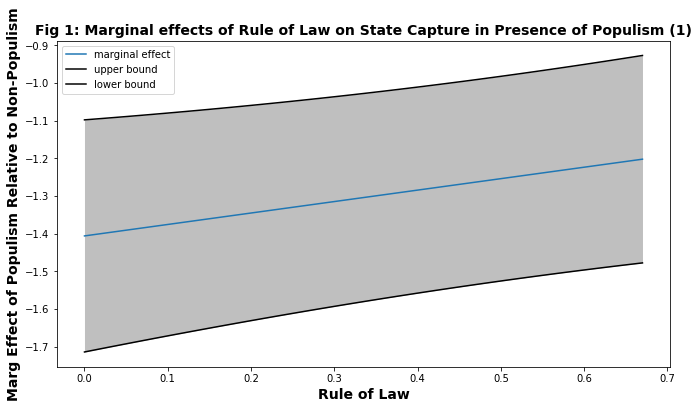

In [555]:
fig, ax = plt.subplots(figsize=(11, 6))
postestimation.plot('rule', 'margeffect', ax=ax, label='marginal effect')
postestimation.plot('rule', 'uci', ax=ax, color='black', label='upper bound')
postestimation.plot('rule', 'lci', ax=ax, color='black', label='lower bound')
ax.fill_between(postestimation['rule'], postestimation['uci'], postestimation['lci'], alpha=.5, linewidth=0, color='gray')
ax.set_ylabel('Marg Effect of Populism Relative to Non-Populism', weight='bold', fontsize=14)
ax.set_xlabel('Rule of Law', weight='bold', fontsize=14)
ax.set_title('Fig 1: Marginal effects of Rule of Law on State Capture in Presence of Populism (1)', weight='bold', fontsize = 14)

In [556]:
postestimation = pd.DataFrame(rule)
postestimation.columns = ['rule']

# calculate main marginal effect
postestimation['margeffect'] = b1+b3*postestimation['rule']
# calculate upper and lower Confidence Intervals
postestimation['consx']= np.sqrt(var1 + var3 * (postestimation['rule']**2) + 2 * covb1b3 * postestimation['rule'])

postestimation['ax'] = 1.96 * postestimation['consx']

postestimation['uci'] = postestimation['margeffect'] + postestimation['ax']

postestimation['lci'] = postestimation['margeffect'] - postestimation['ax']


In [557]:
postestimation

,rule,margeffect,consx,ax,uci,lci
0,0.00,-0.236167,0.069254,0.135737,-0.100430,-0.371905
1,0.01,-0.233126,0.067905,0.133095,-0.100032,-0.366221
2,0.02,-0.230085,0.066561,0.130460,-0.099625,-0.360545
3,0.03,-0.227043,0.065222,0.127834,-0.099209,-0.354878
4,0.04,-0.224002,0.063887,0.125218,-0.098784,-0.349220
...,...,...,...,...,...,...
63,0.63,-0.044564,0.036799,0.072125,0.027561,-0.116689
64,0.64,-0.041523,0.037868,0.074222,0.032700,-0.115745
65,0.65,-0.038481,0.038963,0.076367,0.037886,-0.114849
66,0.66,-0.035440,0.040080,0.078557,0.043117,-0.113997


**The Below Plot is the correct Way to DO IT!!!** Not the one above it is wrong when the marginal effect was calculated using B2 rather than B1+B3 * (multiplied) range of X2

Text(0.5, 1.0, 'Fig 1: Marginal effects Populism on State Capture as Rule of Law Varies')

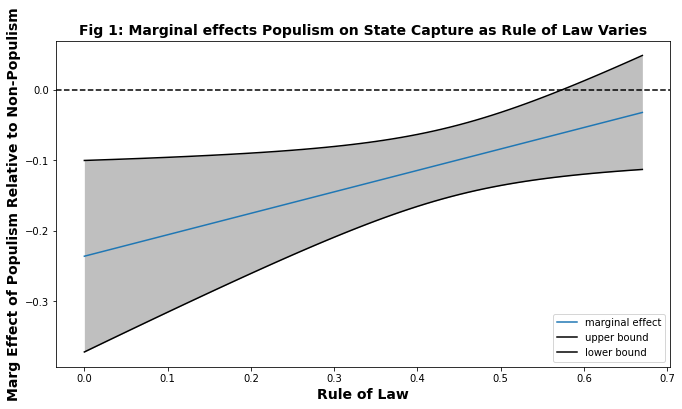

In [558]:
fig, ax = plt.subplots(figsize=(11, 6))
postestimation.plot('rule', 'margeffect', ax=ax, label='marginal effect')
postestimation.plot('rule', 'uci', ax=ax, color='black', label='upper bound')
postestimation.plot('rule', 'lci', ax=ax, color='black', label='lower bound')
ax.fill_between(postestimation['rule'], postestimation['uci'], postestimation['lci'], alpha=.5, linewidth=0, color='gray')
ax.set_ylabel('Marg Effect of Populism Relative to Non-Populism', weight='bold', fontsize=14)
ax.axhline(0.0, color='black', ls='--')
ax.set_xlabel('Rule of Law', weight='bold', fontsize=14)
ax.set_title('Fig 1: Marginal effects Populism on State Capture as Rule of Law Varies', weight='bold', fontsize = 14)

**Focusing on plot 2 now, this shows the marginal effect of a 0-to-1 change in populism on your DV (y-axis), across the range of rule-of-law. So you are able to see how---at each value of rule-of-law (x-axis)---the effect of a 0-to-1 increase in populism (on Y) changes. If you were to want to reverse this plot, to instead plot the effect of a change in rule of law on the DV across the range of populism, you would then want to modify the original loop I sent you as follows**

 #store SD size of rule of law
 SDsize<-sd(ruleoflaw)

 #loop through values of populism at 1 unit increments, calculating MEs & 95% CIs
 for(i in seq(0,1,1)){
   
     #store the current value of Populism that you are looping through
     value<-rbind(value,i)
   
     #calculate main marginal effect
     margeffect<-b2*SDsize+b3*SDsize*i
   
     #calculate upper and lower confidence intervals
     consx<-sqrt(varb2+varb3*(i^2)+2*covb2b3*i)
     ax<-1.96*consx
     uci<-margeffect+ax
     lci<-margeffect-ax
   
     #now combine current loop iteration's marginal effects values with all past values
     b1.effect<-rbind(b2.effect,margeffect)
     b1.uci<-rbind(b2.uci,uci)
     b1.lci<-rbind(b1.lci,lci)
} #close loop

**This is calculating the marginal effect of a one standard deviation increase in rule-of-law at populism=0 and populism=1. So you would only want to plot those two points for populism on the x-axis.**

**In your correct plot2 code, consx is the standard error for the marginal effect of populism on your DV, for the desired values of rule-of-law. You could rename it something more intuitive if you'd like. 'ax' is just 1.96 times the standard error, to get the 95% confidence interval amount (once you add and subtract that form the main effect).**

**6. With the loop I present above and your corrected version of the first loop I sent you, you should be able to create these now. For example, to modify the more recent loop in the present email to instead plot an interaction for two binary variables, remove the SDsize piece. If you have two continuous variables, instead use your corrected version of the first loop but add in the SDsize piece (so that it is evaluating a SD increase in your marginal effect variable rather than a 1 unit increase, which it is doing automatically without SDsize)**

In [559]:
type(SDsize)
type(POPDV)
type(b2)

numpy.float64

In [560]:
POPDV = np.arange(0, 2, 1)
SDsize = model['v2x_rule'].std()

#calculate main marginal effect
margeffect=b2*SDsize+b3*SDsize*POPDV

#calculate upper and lower confidence intervals
consx = np.sqrt(var2 + var3 * (POPDV**2) + 2 * covb2b3 * POPDV)
ax = 1.96 * consx
uci = margeffect + ax
lci = margeffect - ax

     #now combine the above variables into a dataframe for the marginal effects s marginal effects

postestimation = pd.DataFrame(POPDV)
postestimation['margeffect'] = margeffect
postestimation['consx'] = consx
postestimation['ax'] = ax
postestimation['uci'] = uci
postestimation['lci'] = lci


PopDV_axes_change_location = [.25, .75]
PopDV_axes_change_location = pd.Series(PopDV_axes_change_location)

postestimation['PopDV_axes_change_location'] = PopDV_axes_change_location
postestimation.columns = ['PopDV', 'margeffect', 'consx', 'ax', 'uci', 'lci', 'PopDV_axes_change_location']



In [561]:
postestimation

,PopDV,margeffect,consx,ax,uci,lci,PopDV_axes_change_location
0,0,-0.359976,0.157242,0.308195,-0.051782,-0.668171,0.25
1,1,-0.282118,0.155669,0.305112,0.022993,-0.587230,0.75


In [562]:
postestimation.iloc[0, 4]

-0.05178166486406449

Text(0.5, 1.0, 'Marginal Effect Rule of Law on State Capture as Populism Δ 0 to 1')

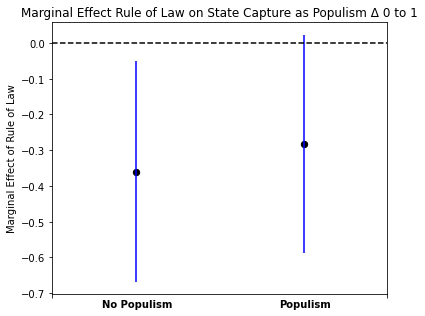

In [563]:
fig, ax = plt.subplots(figsize = (6, 5))
postestimation.plot('PopDV_axes_change_location', 'margeffect', kind='scatter', ax=ax, color='black', s=40)
# postestimation.plot('PopDV', 'uci', kind='scatter', ax=ax, label='Upper Bound')
# postestimation.plot('PopDV', 'lci', kind='scatter', ax=ax, label='Lower Bound')

#ax.errorbar(postestimation['PopDV'], postestimation['margeffect'], yerr = postestimation['ax'], xerr = None)
# ax.vlines(0, postestimation.iloc[0, 4], postestimation.iloc[0, 5],  color='blue')
# ax.vlines(1, postestimation.iloc[1, 4], postestimation.iloc[1, 5],  color='blue')

ax.vlines(.25, postestimation.iloc[0, 4], postestimation.iloc[0, 5],  color='blue')
ax.vlines(.75, postestimation.iloc[1, 4], postestimation.iloc[1, 5],  color='blue')

ax.axhline(y=0, xmin=0, xmax=1, linestyle = '--', color='black')

fig.text(.24, .09, 'No Populism', weight='bold')
fig.text(.65, .09, 'Populism', weight='bold')

ax.set_xticks([0, 1])
ax.set_xticklabels("")

ax.set_xlabel("")
ax.set_ylabel("Marginal Effect of Rule of Law")
ax.set_title("Marginal Effect Rule of Law on State Capture as Populism \u0394 0 to 1")


In [564]:
postestimation

,PopDV,margeffect,consx,ax,uci,lci,PopDV_axes_change_location
0,0,-0.359976,0.157242,0.308195,-0.051782,-0.668171,0.25
1,1,-0.282118,0.155669,0.305112,0.022993,-0.587230,0.75


# **Creating continous by continous interactions marginal effects plots**

In [565]:
# random effects 

# added variables 
extras = ['v2xlg_legcon', 'v2x_jucon', 'v2x_rule', 'v2x_cspart', 'v2x_accountability transformed', 'v2xnp_pres', 'v2xcl_prpty']
exog_vars = ['PopDV', 'v2x_rule', 'POLITY10', 'interaction_continous'] # use VDM EDI this will be initial model
# We build on top of this model and add variables stepwise to see if we continue to have the positive statistically significant effect of the interaction term of populism and rule of law
# we try to find a model where it is not statistically significant include  populismDV RULE OF LAW AND INTERACTION IN EVERY MODEL 

#  'prtyin', 'LogGDPPC', 'PercentPOP.Urban.WB', 'Econ.Freedom.Heritage', 'v2x_rule', 'v2x_accountability transformed', 'v2xcl_prpty', 'interaction', 'POLITY10']
exog = sm.add_constant(model[exog_vars])
mod = RandomEffects(model['State.Capture.Inverted.Transformed'], exog)
re_res_continous_interaction = mod.fit()
print(re_res_continous_interaction)

                                RandomEffects Estimation Summary                                
Dep. Variable:     State.Capture.Inverted.Transformed   R-squared:                        0.2190
Estimator:                              RandomEffects   R-squared (Between):              0.5739
No. Observations:                                 341   R-squared (Within):               0.0980
Date:                                Sun, Jul 10 2022   R-squared (Overall):              0.5513
Time:                                        05:00:55   Log-likelihood                    152.01
Cov. Estimator:                            Unadjusted                                           
                                                        F-statistic:                      23.559
Entities:                                          18   P-value                           0.0000
Avg Obs:                                       18.944   Distribution:                   F(4,336)
Min Obs:                      

/usr/local/lib/python3.7/dist-packages/linearmodels/shared/exceptions.py:37: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  warnings.warn(missing_value_warning_msg, MissingValueWarning)


In [566]:
re_res_continous_interaction.params

const                    3.214256
PopDV                   -0.101364
v2x_rule                -0.651550
POLITY10                 0.015048
interaction_continous   -0.030044
Name: parameter, dtype: float64

In [567]:
# extracting out the model coefficients for our 3 variables of interest for the marg effects to include: rule of law, polity, and the interaction
b1 = re_res_continous_interaction.params[2]
b2 = re_res_continous_interaction.params[3]
b3 = re_res_continous_interaction.params[4]

In [568]:
# the variance-co-variance matrix 
re_res_continous_interaction.cov

,const,PopDV,v2x_rule,POLITY10,interaction_continous
const,0.029633,-0.000692,-0.067273,-0.001422,0.003693
PopDV,-0.000692,0.000632,-0.000476,0.000004,0.000070
v2x_rule,-0.067273,-0.000476,0.471744,0.003240,-0.024657
POLITY10,-0.001422,0.000004,0.003240,0.000099,-0.000211
interaction_continous,0.003693,0.000070,-0.024657,-0.000211,0.001345


In [569]:
# extracting out the variances of our 3 variables of interest 
varb1 = re_res_continous_interaction.cov['v2x_rule'].iloc[2]
varb2 = re_res_continous_interaction.cov['POLITY10'].iloc[3]
varb3 = re_res_continous_interaction.cov['interaction_continous'].iloc[4]

In [570]:
# extracting out the co-variances for our 3 variables of interest for the interaction term
covb1b3 = re_res_continous_interaction.cov['interaction_continous'].iloc[2]
covb2b3 = re_res_continous_interaction.cov['interaction_continous'].iloc[3]
covb2b3

-0.00021083367182052643

In [571]:
model['POLITY10'].min(), model['POLITY10'].max()

(7, 20)

In [572]:
# sequencing our x variable of interest POLITY 10 from its min to its max for the marg effects predictions 
z0 = np.arange(7, 21, 1)
z0 = pd.Series(z0)



# calculating the rate of change or marginal effect
dy_dx = b1 + b3 * z0
# calculating the standard error's (se's) of the marginal effect
se_dy_dx = np.sqrt(varb1 + z0**2 * varb3 + 2 * z0 * covb1b3)
# calculating the upper bound CI
upr = dy_dx + 1.96 * se_dy_dx
# calculating the lower bound CI
lwr = dy_dx - 1.96 * se_dy_dx

# create a dataframe and add all variables in it 
continous_int_dataframe = pd.DataFrame(z0)
continous_int_dataframe['dy_dx'] = dy_dx
continous_int_dataframe['se_dy_dx'] = se_dy_dx
continous_int_dataframe['upr'] = upr
continous_int_dataframe['lwr'] = lwr 

continous_int_dataframe.columns = ['POLITY10', 'dy_dx', 'se_dy_dx', 'upr', 'lwr']
continous_int_dataframe


,POLITY10,dy_dx,se_dy_dx,upr,lwr
0,7,-0.861860,0.438677,-0.002054,-1.721667
1,8,-0.891905,0.404096,-0.099877,-1.683933
2,9,-0.921949,0.369917,-0.196911,-1.646987
3,10,-0.951994,0.336264,-0.292916,-1.611071
4,11,-0.982038,0.303311,-0.387549,-1.576527
5,12,-1.012082,0.271313,-0.480309,-1.543855
6,13,-1.042127,0.240651,-0.570450,-1.513804
7,14,-1.072171,0.211908,-0.656832,-1.487510
8,15,-1.102216,0.185973,-0.737709,-1.466723
9,16,-1.132260,0.164184,-0.810460,-1.454060


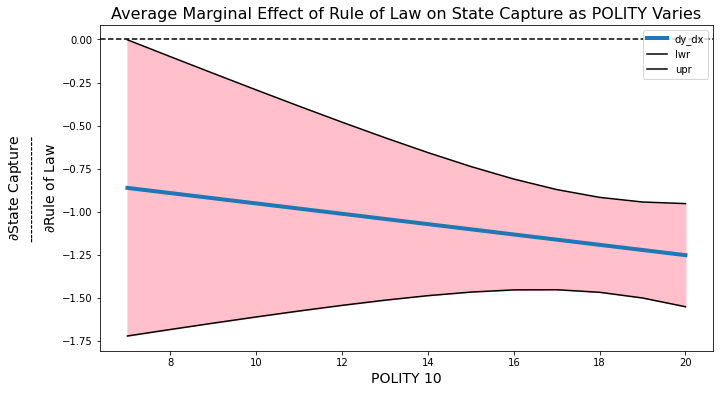

In [573]:
# The plot

fig, ax = plt.subplots(figsize=(11, 6))
continous_int_dataframe.plot("POLITY10", "dy_dx", ax=ax, lw=4)
continous_int_dataframe.plot("POLITY10", "lwr", ax=ax, color='black')
continous_int_dataframe.plot("POLITY10", "upr", ax=ax, color='black')

ax.axhline(0.00, linestyle="--", color= 'black')
ax.set_xlabel("POLITY 10", fontsize=14)
ax.set_ylabel("$\partial$State Capture\n----------------------\n$\partial$Rule of Law", fontsize = 14)
ax.set_title("Average Marginal Effect of Rule of Law on State Capture as POLITY Varies", fontsize=16)
ax.legend(loc='upper right')
ax.fill_between(continous_int_dataframe["POLITY10"], continous_int_dataframe["upr"], continous_int_dataframe["lwr"], color='pink')

**6. With the loop I present above and your corrected version of the first loop I sent you, you should be able to create these now. For example, to modify the more recent loop in the present email to instead plot an interaction for two binary variables, remove the SDsize piece. If you have two continuous variables, instead use your corrected version of the first loop but add in the SDsize piece (so that it is evaluating a SD increase in your marginal effect variable rather than a 1 unit increase, which it is doing automatically without SDsize)**

**The below code EVALUATES A 1 STD INCREASE IN MARGINAL EFFECT RATHER THAN A 1 UNIT INCREASE WHICH IT DOES AUTOMATICALLY WITHOUT ADDING IN THE STANDARD DEVIATION IN THE MARGINAL EFFECT**

In [574]:
# sequencing our x variable of interest POLITY 10 from its min to its max for the marg effects predictions 
z0 = np.arange(7, 21, 1)
z0 = pd.Series(z0)


# calculating the rate of change or marginal effect
dy_dx = b1*SDsize + b3*SDsize * z0
# calculating the standard error's (se's) of the marginal effect
se_dy_dx = np.sqrt(varb1 + z0**2 * varb3 + 2 * z0 * covb1b3)
# calculating the upper bound CI
upr = dy_dx + 1.96 * se_dy_dx
# calculating the lower bound CI
lwr = dy_dx - 1.96 * se_dy_dx

# create a dataframe and add all variables in it 
continous_int_dataframe = pd.DataFrame(z0)
continous_int_dataframe['dy_dx'] = dy_dx
continous_int_dataframe['se_dy_dx'] = se_dy_dx
continous_int_dataframe['upr'] = upr
continous_int_dataframe['lwr'] = lwr 

continous_int_dataframe.columns = ['POLITY10', 'dy_dx', 'se_dy_dx', 'upr', 'lwr']
continous_int_dataframe


,POLITY10,dy_dx,se_dy_dx,upr,lwr
0,7,-0.220636,0.438677,0.639170,-1.080443
1,8,-0.228328,0.404096,0.563700,-1.020355
2,9,-0.236019,0.369917,0.489019,-0.961057
3,10,-0.243710,0.336264,0.415367,-0.902788
4,11,-0.251402,0.303311,0.343087,-0.845891
5,12,-0.259093,0.271313,0.272680,-0.790866
6,13,-0.266785,0.240651,0.204892,-0.738461
7,14,-0.274476,0.211908,0.140863,-0.689815
8,15,-0.282167,0.185973,0.082340,-0.646674
9,16,-0.289859,0.164184,0.031941,-0.611659


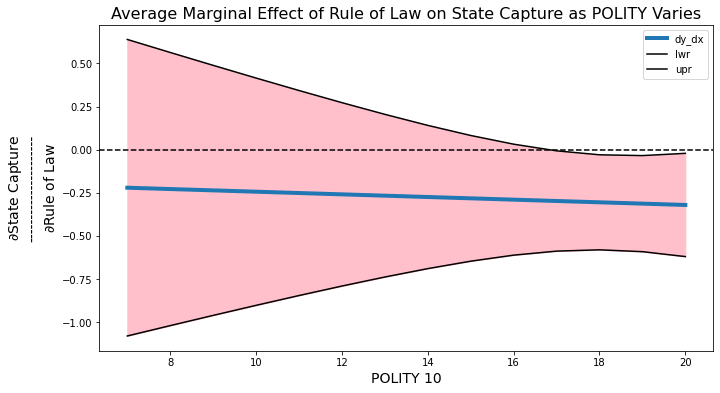

In [575]:
# The plot

fig, ax = plt.subplots(figsize=(11, 6))
continous_int_dataframe.plot("POLITY10", "dy_dx", ax=ax, lw=4)
continous_int_dataframe.plot("POLITY10", "lwr", ax=ax, color='black')
continous_int_dataframe.plot("POLITY10", "upr", ax=ax, color='black')

ax.axhline(0.00, linestyle="--", color= 'black')
ax.set_xlabel("POLITY 10", fontsize=14)
ax.set_ylabel("$\partial$State Capture\n----------------------\n$\partial$Rule of Law", fontsize = 14)
ax.set_title("Average Marginal Effect of Rule of Law on State Capture as POLITY Varies", fontsize=16)
ax.legend(loc='upper right')
ax.fill_between(continous_int_dataframe["POLITY10"], continous_int_dataframe["upr"], continous_int_dataframe["lwr"], color='pink')

In [576]:
# same as a above but this time using b2 instead of b1 so using POLITY rather than rule of law 
# sequencing our x variable of interest POLITY 10 from its min to its max for the marg effects predictions 
z0 = np.arange(7, 21, 1)
z0 = pd.Series(z0)

# calculating the rate of change or marginal effect
dy_dx = b2 + b3 * z0
# calculating the standard error's (se's) of the marginal effect
se_dy_dx = np.sqrt(varb2 + z0**2 * varb3 + 2 * z0 * covb2b3)
# calculating the upper bound CI
upr = dy_dx + 1.96 * se_dy_dx
# calculating the lower bound CI
lwr = dy_dx - 1.96 * se_dy_dx

# create a dataframe and add all variables in it 
continous_int_dataframe = pd.DataFrame(z0)
continous_int_dataframe['dy_dx'] = dy_dx
continous_int_dataframe['se_dy_dx'] = se_dy_dx
continous_int_dataframe['upr'] = upr
continous_int_dataframe['lwr'] = lwr 

continous_int_dataframe.columns = ['POLITY10', 'dy_dx', 'se_dy_dx', 'upr', 'lwr']
continous_int_dataframe

,POLITY10,dy_dx,se_dy_dx,upr,lwr
0,7,-0.195262,0.251067,0.296828,-0.687353
1,8,-0.225307,0.287719,0.338623,-0.789237
2,9,-0.255351,0.324376,0.380425,-0.891128
3,10,-0.285396,0.361035,0.422233,-0.993024
4,11,-0.315440,0.397696,0.464044,-1.094923
5,12,-0.345484,0.434358,0.505857,-1.196826
6,13,-0.375529,0.471021,0.547673,-1.298731
7,14,-0.405573,0.507686,0.589491,-1.400637
8,15,-0.435617,0.544351,0.631310,-1.502545
9,16,-0.465662,0.581016,0.673130,-1.604454


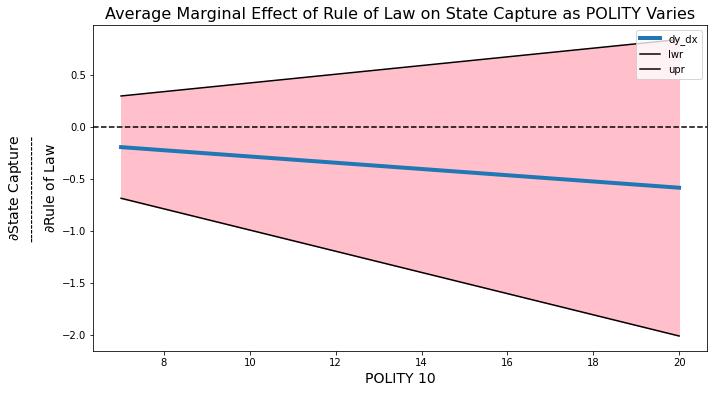

In [577]:
# The plot

fig, ax = plt.subplots(figsize=(11, 6))
continous_int_dataframe.plot("POLITY10", "dy_dx", ax=ax, lw=4)
continous_int_dataframe.plot("POLITY10", "lwr", ax=ax, color='black')
continous_int_dataframe.plot("POLITY10", "upr", ax=ax, color='black')

ax.axhline(0.00, linestyle="--", color= 'black')
ax.set_xlabel("POLITY 10", fontsize=14)
ax.set_ylabel("$\partial$State Capture\n----------------------\n$\partial$Rule of Law", fontsize = 14)
ax.set_title("Average Marginal Effect of Rule of Law on State Capture as POLITY Varies", fontsize=16)
ax.legend(loc='upper right')
ax.fill_between(continous_int_dataframe["POLITY10"], continous_int_dataframe["upr"], continous_int_dataframe["lwr"], color='pink')

# **Creating a forest plot**

In [578]:
pvalues = re_res.pvalues
params = re_res.params

In [579]:
import numpy as np
coefficientestimates = re_res.params
conf = re_res.conf_int()

# convert log odds to ORs
forest = pd.DataFrame(conf)
forest['pvalues'] = pvalues
forest['coefficientestimates'] = params

# change index labels 
index = ['Constant', 'Populism', 'Rule of Law', 'Interaction', 'POLITY10']
forest.rename(index={'const': 'Constant', 'PopDV': 'Populism', 'v2x_rule':'Rule of Law', 'interaction': 'Interaction'}, inplace=True)
significance = ['significant', 'significant', 'significant', 'significant', 'not significant']

forest['significance'] = significance
forest


,lower,upper,pvalues,coefficientestimates,significance
Constant,3.121455,3.697963,0.000000,3.409709,significant
Populism,-0.372393,-0.099942,0.000728,-0.236167,significant
Rule of Law,-1.715460,-1.096854,0.000000,-1.406157,significant
Interaction,0.018954,0.589311,0.036670,0.304133,significant
POLITY10,-0.005513,0.026503,0.198069,0.010495,not significant


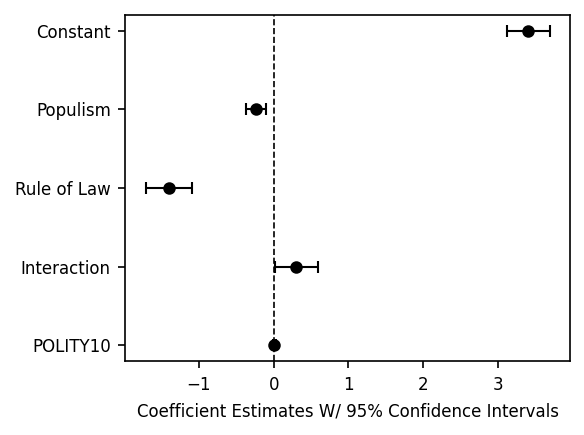

In [580]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4, 3), dpi=150)

ci = [forest.iloc[::-1]['coefficientestimates'] - forest.iloc[::-1]['lower'].values, forest.iloc[::-1]['upper'].values - forest.iloc[::-1]['coefficientestimates']]
plt.errorbar(x=forest.iloc[::-1]['coefficientestimates'], y=forest.iloc[::-1].index.values, xerr=ci,
            color='black',  capsize=3, linestyle='None', linewidth=1,
            marker="o", markersize=5, mfc="black", mec="black")
plt.axvline(x=0, linewidth=0.8, linestyle='--', color='black')
plt.tick_params(axis='both', which='major', labelsize=8)
plt.xlabel('Coefficient Estimates W/ 95% Confidence Intervals', fontsize=8)
plt.tight_layout()
# plt.savefig('raw_forest_plot.png')
plt.show()


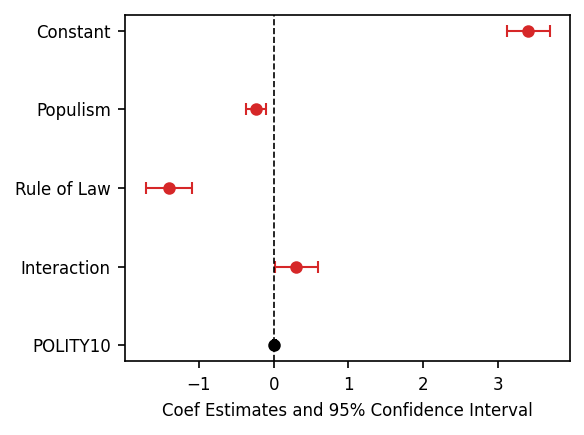

In [581]:
fig, ax = plt.subplots(nrows=1, sharex=True, sharey=True, figsize=(4, 3), dpi=150)
for idx, row in forest.iloc[::-1].iterrows():
    ci = [[row['coefficientestimates'] - row[::-1]['lower']], [row['upper'] - row['coefficientestimates']]]
    if row['significance'] == 'significant':
        plt.errorbar(x=[row['coefficientestimates']], y=[row.name], xerr=ci,
            ecolor='tab:red', capsize=3, linestyle='None', linewidth=1, marker="o", 
                     markersize=5, mfc="tab:red", mec="tab:red")
    else:
        plt.errorbar(x=[row['coefficientestimates']], y=[row.name], xerr=ci,
            ecolor='black', capsize=3, linestyle='None', linewidth=1, marker="o", 
                     markersize=5, mfc="black", mec="black")
plt.axvline(x=0, linewidth=0.8, linestyle='--', color='black')
plt.tick_params(axis='both', which='major', labelsize=8)
plt.xlabel('Coef Estimates and 95% Confidence Interval', fontsize=8)
plt.tight_layout()

plt.show()

In [582]:
forest[:]

,lower,upper,pvalues,coefficientestimates,significance
Constant,3.121455,3.697963,0.000000,3.409709,significant
Populism,-0.372393,-0.099942,0.000728,-0.236167,significant
Rule of Law,-1.715460,-1.096854,0.000000,-1.406157,significant
Interaction,0.018954,0.589311,0.036670,0.304133,significant
POLITY10,-0.005513,0.026503,0.198069,0.010495,not significant


In [583]:
forest.iloc[:, 3:5]

,coefficientestimates,significance
Constant,3.409709,significant
Populism,-0.236167,significant
Rule of Law,-1.406157,significant
Interaction,0.304133,significant
POLITY10,0.010495,not significant


In [584]:
re_res


Dep. Variable:,State.Capture.Inverted.Transformed,R-squared:,0.2409
Estimator:,RandomEffects,R-squared (Between):,0.6122
No. Observations:,341,R-squared (Within):,0.0942
Date:,"Sun, Jul 10 2022",R-squared (Overall):,0.5877
Time:,05:00:54,Log-likelihood,150.09
Cov. Estimator:,Unadjusted,,
,,F-statistic:,26.656
Entities:,18,P-value,0.0000
Avg Obs:,18.944,Distribution:,"F(4,336)"
Min Obs:,18.000,,
Max Obs:,19.000,F-statistic (robust):,26.208


In [585]:
# fixed effects 
mod = PanelOLS(model['State.Capture.Inverted.Transformed'], exog, entity_effects=True, time_effects=True)

re_res = mod.fit()

print(re_res)

                                  PanelOLS Estimation Summary                                   
Dep. Variable:     State.Capture.Inverted.Transformed   R-squared:                        0.1190
Estimator:                                   PanelOLS   R-squared (Between):              0.3607
No. Observations:                                 341   R-squared (Within):               0.1270
Date:                                Sun, Jul 10 2022   R-squared (Overall):              0.3491
Time:                                        05:00:58   Log-likelihood                    192.80
Cov. Estimator:                            Unadjusted                                           
                                                        F-statistic:                      10.169
Entities:                                          18   P-value                           0.0000
Avg Obs:                                       18.944   Distribution:                   F(4,301)
Min Obs:                      

/usr/local/lib/python3.7/dist-packages/linearmodels/shared/exceptions.py:37: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  warnings.warn(missing_value_warning_msg, MissingValueWarning)


Notes for Models 


*   Economic Freedom
*   



In [586]:
# mixed effects effects
%matplotlib inline

import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tools.sm_exceptions import ConvergenceWarning

In [587]:
sc_pop.columns

Index(['ID', 'Country', 'year', 'FDI_Inflows',
       'DV_Populism (populist president in power that year or not (0 or 1) ',
       'Time', 'TRANS', 'VDEM.Party.Inst', 'prtyin', 'Logprtyin',
       'SQPrtyinPower', 'CubedPrtyinPower',
       'State.Capture.Inverted.Transformed', 'State.Capture.Inverted',
       'State_Capture (WB)', 'State_Capture.WB.Transformed', 'GDPPC.WB',
       'LogGDPPC', 'VDEM.Lib.DEM', 'POLITY', 'POLITY10', 'POLITYDV',
       'Civ_Lib_FH_1to7_7worst', 'Drug_Trafficking', 'Resource_Extraction',
       'PrtyinPowerXLogGDPPC', 'PercentPOP.Urban.WB', 'POP.WB', 'LogPOP.WB',
       'TOTPercentNatResRentsGDP.WB', 'Econ.Freedom.Heritage',
       'Log.Econ.Freedom.Heritage', 'GDP', 'LogGDP', 'country_text_id',
       'v2x_jucon', 'v2xlg_legcon', 'v2pscohesv', 'v2x_rule', 'v2xcl_prpty',
       'v2xcl_acjst', 'v2x_cspart', 'v2psprlnks', 'v2lgcrrpt', 'v2exbribe',
       'v2mecenefm', 'v2xnp_pres', 'v2xnp_client', 'v2xps_party',
       'v2x_accountability', 'v2x_accountabil

In [588]:
sc_pop

,ID,Country,year,FDI_Inflows,DV_Populism (populist president in power that year or not (0 or 1),Time,TRANS,VDEM.Party.Inst,prtyin,Logprtyin,...,v2x_accountability,v2x_accountability transformed,prtyinXaccountability,prtyinXlegconstraints,prtyinXjudicialconstraints,prtyinXpresidentialism,Year,PopDV,YearsPOP,country_new
0,1,Argentina,1996,6.948537e+09,NaN,0,0.0,0.688,7.0,0.845098,...,1.424,2.474,17.318,4.865,4.109,2.205,1996,0,0.0,Argentina
1,1,Argentina,1997,9.160272e+09,NaN,1,0.0,0.688,8.0,0.903090,...,1.414,2.464,19.712,5.560,4.696,2.520,1997,0,0.0,Argentina
2,1,Argentina,1998,7.290657e+09,NaN,2,0.0,0.688,9.0,0.954243,...,1.423,2.473,22.257,6.255,5.409,2.799,1998,0,0.0,Argentina
3,1,Argentina,1999,2.398770e+10,NaN,3,0.0,0.688,10.0,1.000000,...,1.429,2.479,24.790,6.950,6.070,3.100,1999,0,0.0,Argentina
4,1,Argentina,2000,1.041831e+10,NaN,4,1.0,0.682,1.0,0.000000,...,1.484,2.534,2.534,0.701,0.717,0.234,2000,0,0.0,Argentina
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,19,Venezuela,2012,4.986000e+09,NaN,16,0.0,0.544,14.0,1.146128,...,-0.070,0.980,13.720,0.434,0.504,13.258,2012,1,14.0,Venezuela
391,19,Venezuela,2013,2.145000e+09,NaN,17,0.0,0.572,15.0,1.176091,...,-0.259,0.791,11.865,0.465,0.345,14.490,2013,1,15.0,Venezuela
392,19,Venezuela,2014,1.135000e+09,NaN,18,0.0,0.570,16.0,1.204120,...,-0.295,0.755,12.080,0.496,0.288,15.504,2014,1,16.0,Venezuela
393,19,Venezuela,2015,2.956000e+09,NaN,19,0.0,0.550,17.0,1.230449,...,-0.179,0.871,14.807,3.247,0.306,16.337,2015,1,17.0,Venezuela


In [589]:
sc_pop.columns

Index(['ID', 'Country', 'year', 'FDI_Inflows',
       'DV_Populism (populist president in power that year or not (0 or 1) ',
       'Time', 'TRANS', 'VDEM.Party.Inst', 'prtyin', 'Logprtyin',
       'SQPrtyinPower', 'CubedPrtyinPower',
       'State.Capture.Inverted.Transformed', 'State.Capture.Inverted',
       'State_Capture (WB)', 'State_Capture.WB.Transformed', 'GDPPC.WB',
       'LogGDPPC', 'VDEM.Lib.DEM', 'POLITY', 'POLITY10', 'POLITYDV',
       'Civ_Lib_FH_1to7_7worst', 'Drug_Trafficking', 'Resource_Extraction',
       'PrtyinPowerXLogGDPPC', 'PercentPOP.Urban.WB', 'POP.WB', 'LogPOP.WB',
       'TOTPercentNatResRentsGDP.WB', 'Econ.Freedom.Heritage',
       'Log.Econ.Freedom.Heritage', 'GDP', 'LogGDP', 'country_text_id',
       'v2x_jucon', 'v2xlg_legcon', 'v2pscohesv', 'v2x_rule', 'v2xcl_prpty',
       'v2xcl_acjst', 'v2x_cspart', 'v2psprlnks', 'v2lgcrrpt', 'v2exbribe',
       'v2mecenefm', 'v2xnp_pres', 'v2xnp_client', 'v2xps_party',
       'v2x_accountability', 'v2x_accountabil

In [590]:
sc_pop_mod = sc_pop[['ID', 'FDI_Inflows', 'Time', 'State.Capture.Inverted.Transformed', 'v2x_rule', 'PopDV', 'v2xnp_pres', 'v2x_jucon', 'v2x_accountability transformed', 'LogGDPPC' ]]
sc_pop_mod.columns = ['ID', 'FDI', 'Time', 'SC', 'ruleoflaw', 'populism', 'presidentialism', 'judicialconstraints', 'accountability', 'LogGDPPC' ]
sc_pop_mod

,ID,FDI,Time,SC,ruleoflaw,populism,presidentialism,judicialconstraints,accountability,LogGDPPC
0,1,6.948537e+09,0,2.601000,0.544,0,0.315,0.587,2.474,3.887693
1,1,9.160272e+09,1,NaN,0.544,0,0.315,0.587,2.464,3.914508
2,1,7.290657e+09,2,2.613000,0.541,0,0.311,0.601,2.473,3.918529
3,1,2.398770e+10,3,NaN,0.547,0,0.310,0.607,2.479,3.890686
4,1,1.041831e+10,4,2.692000,0.669,0,0.234,0.717,2.534,3.886947
...,...,...,...,...,...,...,...,...,...,...
390,19,4.986000e+09,16,3.768169,0.044,1,0.947,0.036,0.980,4.113483
391,19,2.145000e+09,17,3.814032,0.026,1,0.966,0.023,0.791,4.095440
392,19,1.135000e+09,18,3.899562,0.024,1,0.969,0.018,0.755,4.205628
393,19,2.956000e+09,19,3.891322,0.022,1,0.961,0.018,0.871,NaN


In [591]:
sc_pop_mod = sc_pop_mod.dropna()

In [592]:
sc_pop_mod.isna().sum()

ID                     0
FDI                    0
Time                   0
SC                     0
ruleoflaw              0
populism               0
presidentialism        0
judicialconstraints    0
accountability         0
LogGDPPC               0
dtype: int64

In [593]:
sc_pop.columns

Index(['ID', 'Country', 'year', 'FDI_Inflows',
       'DV_Populism (populist president in power that year or not (0 or 1) ',
       'Time', 'TRANS', 'VDEM.Party.Inst', 'prtyin', 'Logprtyin',
       'SQPrtyinPower', 'CubedPrtyinPower',
       'State.Capture.Inverted.Transformed', 'State.Capture.Inverted',
       'State_Capture (WB)', 'State_Capture.WB.Transformed', 'GDPPC.WB',
       'LogGDPPC', 'VDEM.Lib.DEM', 'POLITY', 'POLITY10', 'POLITYDV',
       'Civ_Lib_FH_1to7_7worst', 'Drug_Trafficking', 'Resource_Extraction',
       'PrtyinPowerXLogGDPPC', 'PercentPOP.Urban.WB', 'POP.WB', 'LogPOP.WB',
       'TOTPercentNatResRentsGDP.WB', 'Econ.Freedom.Heritage',
       'Log.Econ.Freedom.Heritage', 'GDP', 'LogGDP', 'country_text_id',
       'v2x_jucon', 'v2xlg_legcon', 'v2pscohesv', 'v2x_rule', 'v2xcl_prpty',
       'v2xcl_acjst', 'v2x_cspart', 'v2psprlnks', 'v2lgcrrpt', 'v2exbribe',
       'v2mecenefm', 'v2xnp_pres', 'v2xnp_client', 'v2xps_party',
       'v2x_accountability', 'v2x_accountabil

In [594]:
sc_pop_mod['populism'] = sc_pop_mod['populism'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [595]:
sc_pop_mod['interaction'] = sc_pop_mod['populism'].astype(int) * sc_pop_mod['ruleoflaw']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [596]:
sc_pop_mod.dtypes

ID                       int64
FDI                    float64
Time                     int64
SC                     float64
ruleoflaw              float64
populism                 int64
presidentialism        float64
judicialconstraints    float64
accountability         float64
LogGDPPC               float64
interaction            float64
dtype: object

In [597]:
# mixed effects model --- have to drop NA values for it to work whether you call the parameter in the function with the "missing" parameter or dropna from the whole df
# the output specifies that the intercept is the random effect and the time variable is the fixed effect and what ever other variables we may add
md = smf.mixedlm("SC ~ Time + populism + ruleoflaw + presidentialism + presidentialism + LogGDPPC + FDI + interaction", sc_pop_mod, groups=sc_pop_mod["ID"], missing='drop',)
mdf = md.fit()
print(mdf.summary())

          Mixed Linear Model Regression Results
Model:              MixedLM  Dependent Variable:  SC      
No. Observations:   338      Method:              REML    
No. Groups:         18       Scale:               0.0192  
Min. group size:    16       Log-Likelihood:      103.9440
Max. group size:    19       Converged:           Yes     
Mean group size:    18.8                                  
----------------------------------------------------------
                Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------
Intercept        4.921    0.323 15.256 0.000  4.289  5.553
Time             0.014    0.003  5.393 0.000  0.009  0.019
populism        -0.123    0.069 -1.785 0.074 -0.258  0.012
ruleoflaw       -1.446    0.274 -5.268 0.000 -1.983 -0.908
presidentialism -0.424    0.205 -2.065 0.039 -0.826 -0.022
LogGDPPC        -0.372    0.087 -4.258 0.000 -0.544 -0.201
FDI              0.000    0.000  1.650 0.099 -0.000  0.000
interact